In [15]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d zwrankin/usfs-tree-canopy-cover

!unzip usfs-tree-canopy-cover.zip

Saving CityBoundaries.cpg to CityBoundaries (2).cpg
Dataset URL: https://www.kaggle.com/datasets/zwrankin/usfs-tree-canopy-cover
License(s): unknown
usfs-tree-canopy-cover.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  usfs-tree-canopy-cover.zip
replace CityBoundaries.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: CityBoundaries
replace CityBoundaries? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: CityBoundaries
replace CityBoundaries? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [16]:
!pip install -q kaggle rasterio geopandas earthpy

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d zwrankin/usfs-tree-canopy-cover
!unzip -o usfs-tree-canopy-cover.zip

Saving CityBoundaries.cpg to CityBoundaries (3).cpg
Dataset URL: https://www.kaggle.com/datasets/zwrankin/usfs-tree-canopy-cover
License(s): unknown
usfs-tree-canopy-cover.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  usfs-tree-canopy-cover.zip
  inflating: CityBoundaries.cpg      
  inflating: CityBoundaries.dbf      
  inflating: CityBoundaries.prj      
  inflating: CityBoundaries.sbn      
  inflating: CityBoundaries.sbx      
  inflating: CityBoundaries.shp      
  inflating: CityBoundaries.shp.xml  
  inflating: CityBoundaries.shx      
  inflating: tcc_10km_resolution.tif  
  inflating: tcc_1km_resolution.tif  


File: tcc_1km_resolution.tif
CRS: EPSG:4326
Transform: | 0.01, 0.00,-130.23|
| 0.00,-0.01, 52.88|
| 0.00, 0.00, 1.00|
Width: 6657, Height: 3114
Number of bands: 1


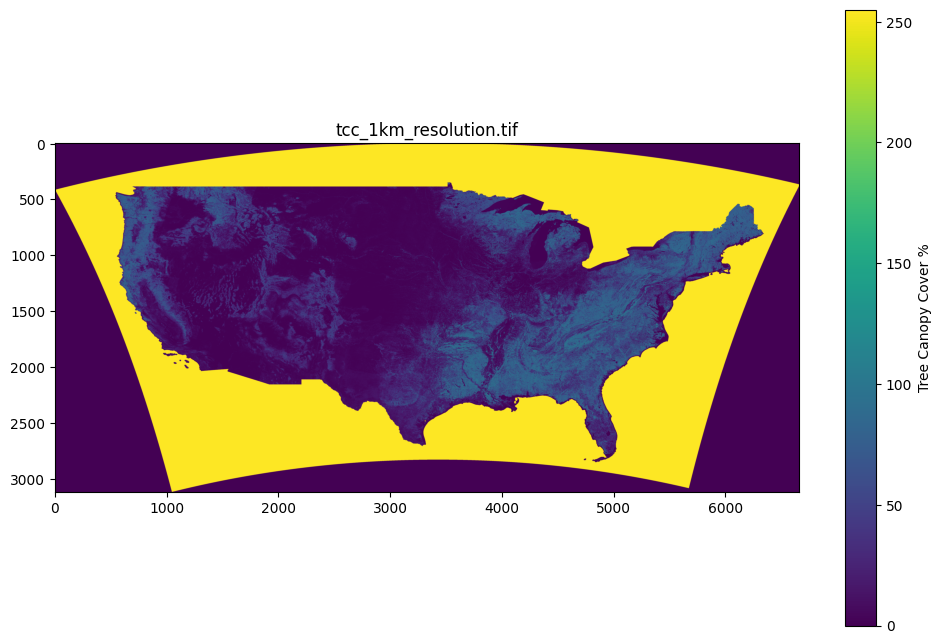

Min: 0.00
Max: 255.00
Mean: 100.61
Std: 116.37
File: tcc_10km_resolution.tif
CRS: EPSG:4326
Transform: | 0.10, 0.00,-130.23|
| 0.00,-0.10, 52.88|
| 0.00, 0.00, 1.00|
Width: 666, Height: 312
Number of bands: 1


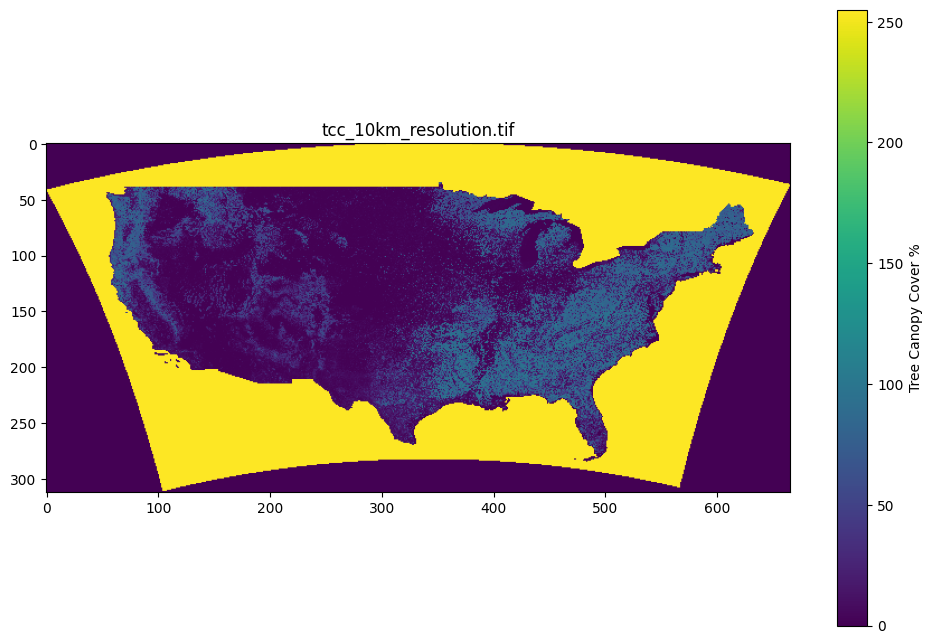

Min: 0.00
Max: 255.00
Mean: 100.49
Std: 116.39


In [17]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def explore_geotiff(file_path):

    with rasterio.open(file_path) as src:
        print(f"File: {file_path}")
        print(f"CRS: {src.crs}")
        print(f"Transform: {src.transform}")
        print(f"Width: {src.width}, Height: {src.height}")
        print(f"Number of bands: {src.count}")


        data = src.read(1)


        data = np.ma.masked_equal(data, src.nodata)


        plt.figure(figsize=(12, 8))
        plt.imshow(data, cmap='viridis')
        plt.colorbar(label='Tree Canopy Cover %')
        plt.title(file_path)
        plt.show()


        print(f"Min: {data.min():.2f}")
        print(f"Max: {data.max():.2f}")
        print(f"Mean: {data.mean():.2f}")
        print(f"Std: {data.std():.2f}")


explore_geotiff('tcc_1km_resolution.tif')
explore_geotiff('tcc_10km_resolution.tif')

       NAME CLASS  ST STFIPS PLACEFIPS  POP2010 STPLFIPS  \
0     Pharr  city  TX     48     57200    70400  4857200   
1   McAllen  city  TX     48     45384   129877  4845384   
2  Edinburg  city  TX     48     22660    77100  4822660   
3    Laredo  city  TX     48     41464   236091  4841464   
4   Mission  city  TX     48     48768    77058  4848768   

                                            geometry  
0  POLYGON ((-10929531.239 3029892.718, -10929486...  
1  POLYGON ((-10934477.721 3037591.957, -10934450...  
2  POLYGON ((-10924696.742 3050068.459, -10924700...  
3  POLYGON ((-11090500.378 3205304.554, -11090391...  
4  POLYGON ((-10946610.1 3030967.743, -10946347.6...  
Number of cities: 500
CRS: EPSG:3857


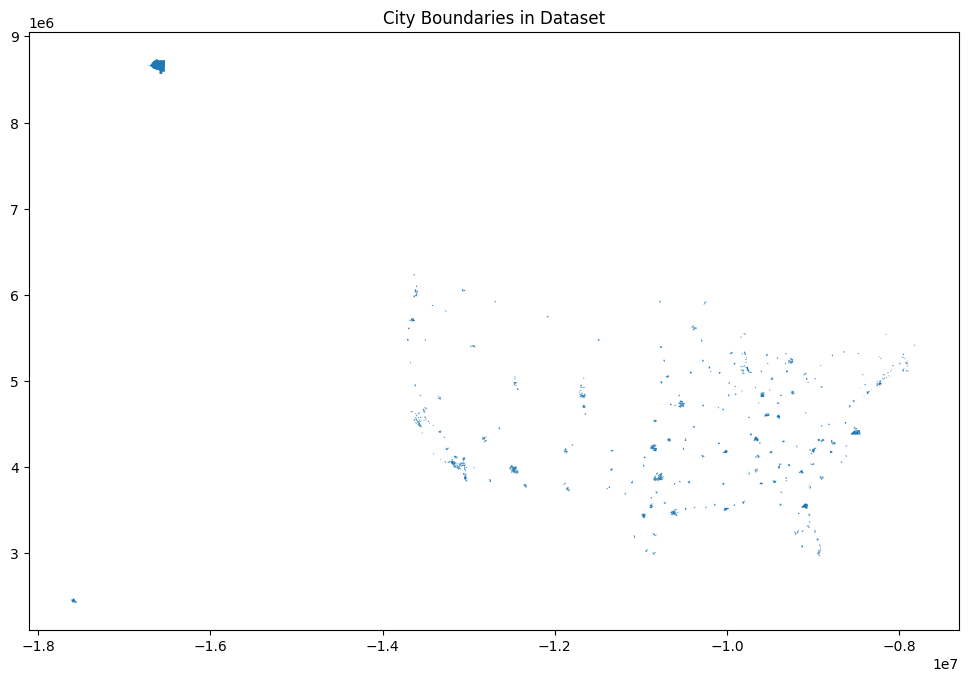

In [18]:
import geopandas as gpd

cities = gpd.read_file('CityBoundaries.shp')

print(cities.head())
print(f"Number of cities: {len(cities)}")
print(f"CRS: {cities.crs}")

cities.plot(figsize=(12, 8))
plt.title('City Boundaries in Dataset')
plt.show()

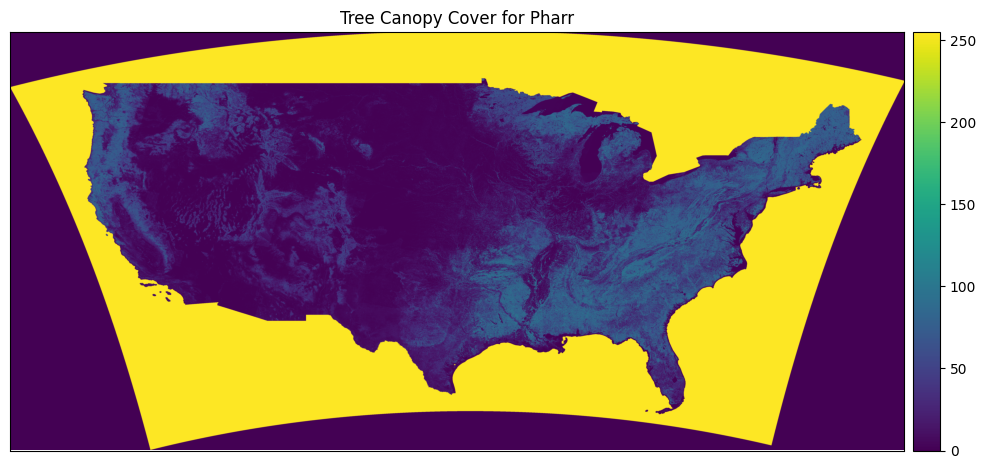

In [19]:
import earthpy.plot as ep


with rasterio.open('tcc_1km_resolution.tif') as src:

    city = cities.iloc[0]


    fig, ax = plt.subplots(figsize=(12, 10))


    city_geom = city.geometry
    gpd.GeoSeries([city_geom]).plot(ax=ax, color='none', edgecolor='red')


    ep.plot_bands(src.read(1, masked=True),
                 ax=ax,
                 cmap='viridis',
                 title=f'Tree Canopy Cover for {city.NAME if "NAME" in cities else "City"}')

    plt.show()

Analyzing 498 cities within raster extent

First 5 cities analyzed:
       city  mean_tcc  median_tcc  min_tcc  max_tcc      area_km2  \
0     Pharr  2.892857         0.0        0       20  5.481598e-09   
1   McAllen  4.144970         0.0        0       72  1.137352e-08   
2  Edinburg  2.985348         0.0        0       40  8.824718e-09   
3    Laredo  1.435301         0.0        0       66  2.134621e-08   
4   Mission  4.137755         0.0        0       66  7.957103e-09   

                                            geometry  
0  POLYGON ((-98.18165 26.24851, -98.18124 26.248...  
1  POLYGON ((-98.22608 26.31053, -98.22584 26.310...  
2  POLYGON ((-98.13822 26.41095, -98.13826 26.410...  
3  POLYGON ((-99.62766 27.65308, -99.62668 27.653...  
4  POLYGON ((-98.33507 26.25717, -98.33271 26.256...  

Summary statistics:
         mean_tcc  median_tcc  min_tcc     max_tcc      area_km2
count  498.000000  498.000000    498.0  498.000000  4.980000e+02
mean     8.208721    1.103414      0

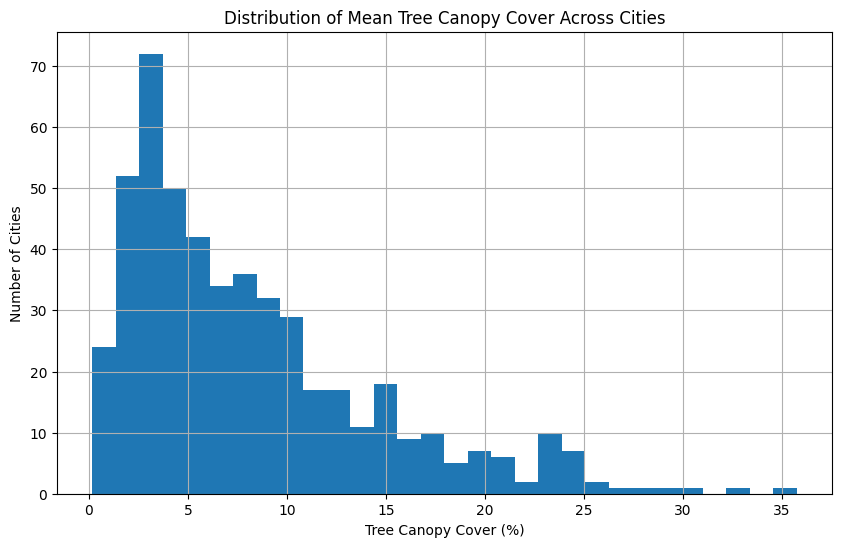

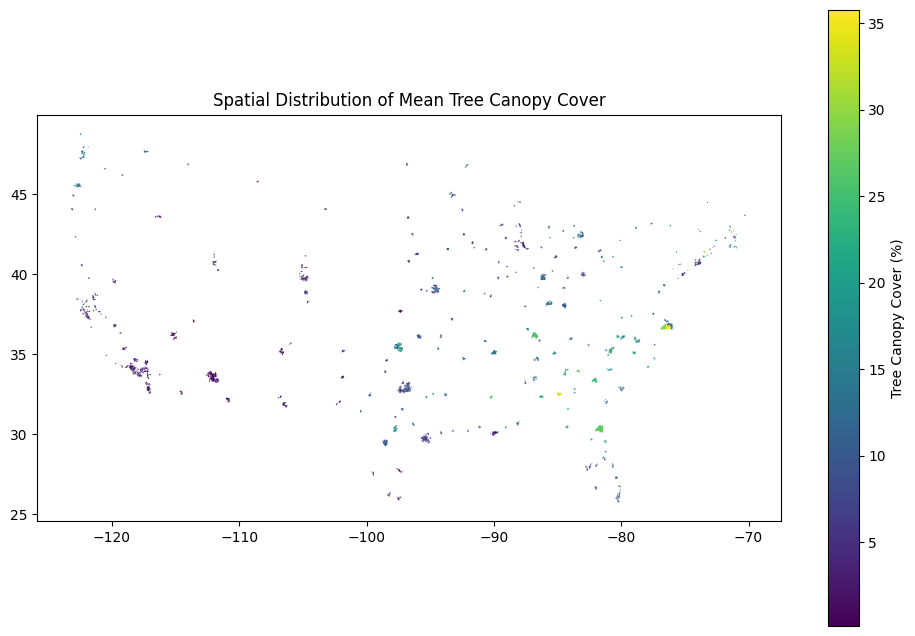

In [20]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

cities = gpd.read_file('CityBoundaries.shp')
with rasterio.open('tcc_1km_resolution.tif') as src:
    raster_crs = src.crs
    raster_bounds = src.bounds
    raster_nodata = src.nodata

if cities.crs != raster_crs:
    cities = cities.to_crs(raster_crs)


raster_polygon = box(*raster_bounds)

cities_within = cities[cities.intersects(raster_polygon)].copy()

if len(cities_within) == 0:
    print("No overlapping cities found - trying point sampling instead")
    cities['centroid'] = cities.geometry.centroid
    with rasterio.open('tcc_1km_resolution.tif') as src:
        cities['tcc'] = [x[0] for x in src.sample(zip(cities.centroid.x, cities.centroid.y))]
    cities = cities[cities['tcc'] != raster_nodata]  # Remove no-data values
    print(cities[['NAME', 'tcc']].head())
else:
    print(f"Analyzing {len(cities_within)} cities within raster extent")


    results = []
    for _, city in cities_within.iterrows():
        with rasterio.open('tcc_1km_resolution.tif') as src:
            try:
                out_image, out_transform = mask(src, [city.geometry], crop=True)
                data = out_image[0]
                data = data[data != src.nodata]

                if len(data) > 0:
                    results.append({
                        'city': city.NAME if 'NAME' in city else f"City {_}",
                        'mean_tcc': np.mean(data),
                        'median_tcc': np.median(data),
                        'min_tcc': np.min(data),
                        'max_tcc': np.max(data),
                        'area_km2': city.geometry.area / 1e6,
                        'geometry': city.geometry
                    })
            except ValueError as e:
                print(f"Error processing {city.NAME if 'NAME' in city else 'City'}: {str(e)}")
                continue

    if results:
        city_tcc = gpd.GeoDataFrame(results, crs=cities.crs)
        print("\nFirst 5 cities analyzed:")
        print(city_tcc.head())


        print("\nSummary statistics:")
        print(city_tcc.describe())


        plt.figure(figsize=(10, 6))
        city_tcc['mean_tcc'].hist(bins=30)
        plt.title('Distribution of Mean Tree Canopy Cover Across Cities')
        plt.xlabel('Tree Canopy Cover (%)')
        plt.ylabel('Number of Cities')
        plt.show()


        fig, ax = plt.subplots(figsize=(12, 8))
        city_tcc.plot(column='mean_tcc', ax=ax, legend=True,
                     legend_kwds={'label': "Tree Canopy Cover (%)"},
                     cmap='viridis')
        plt.title('Spatial Distribution of Mean Tree Canopy Cover')
        plt.show()
    else:
        print("Could not extract data for any cities")

In [21]:
summary = f"""
The dataset contains tree canopy cover information at 1km and 10km resolutions.
Key statistics:
- Cities analyzed: {len(city_tcc)}
- Average tree canopy cover across cities: {city_tcc['mean_tcc'].mean():.1f}%
- Highest canopy cover: {city_tcc['mean_tcc'].max():.1f}% in {city_tcc.loc[city_tcc['mean_tcc'].idxmax(), 'city']}
- Lowest canopy cover: {city_tcc['mean_tcc'].min():.1f}% in {city_tcc.loc[city_tcc['mean_tcc'].idxmin(), 'city']}
"""

print(summary)


The dataset contains tree canopy cover information at 1km and 10km resolutions.
Key statistics:
- Cities analyzed: 498
- Average tree canopy cover across cities: 8.2%
- Highest canopy cover: 35.8% in Chesapeake
- Lowest canopy cover: 0.2% in North Las Vegas



In [22]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.



Q: Which cities have the highest tree canopy coverage?


<Figure size 1000x600 with 0 Axes>

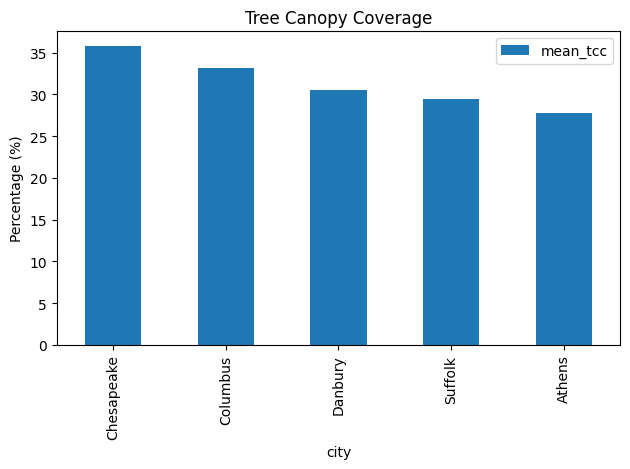

The top 5 cities with highest tree canopy coverage are:
Chesapeake: 35.8%
Columbus: 33.2%
Danbury: 30.5%
Suffolk: 29.5%
Athens: 27.8%

Q: Show me the 3 cities with lowest coverage


<Figure size 1000x600 with 0 Axes>

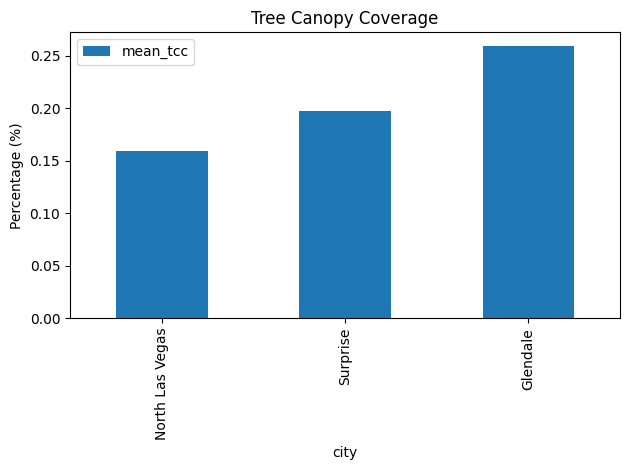

The 3 cities with lowest tree canopy coverage are:
North Las Vegas: 0.2%
Surprise: 0.2%
Glendale: 0.3%

Q: What's the average tree canopy coverage?
The average tree canopy coverage across all cities is 8.2%

Q: Compare coverage between CityA and CityB
Could not find specified cities for comparison

Q: Show me a map of tree canopy coverage


<Figure size 1000x600 with 0 Axes>

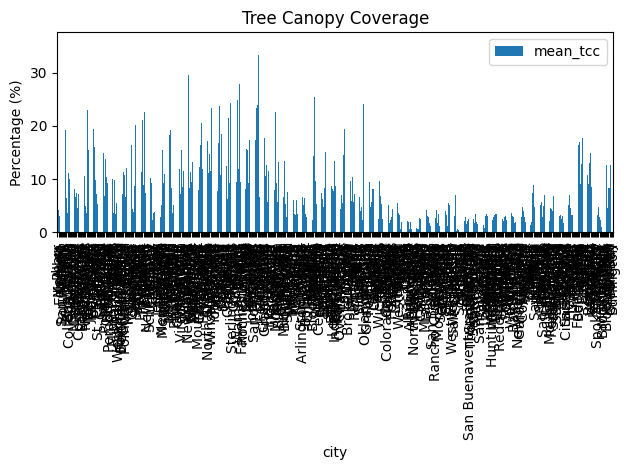

Cities and their tree canopy coverage:
Pharr: 2.9%
McAllen: 4.1%
Edinburg: 3.0%
Laredo: 1.4%
Mission: 4.1%
San Antonio: 9.6%
Round Rock: 11.8%
Austin: 19.2%
Killeen: 6.5%
Brownsville: 3.7%
San Angelo: 11.2%
College Station: 9.9%
Bryan: 10.5%
Houston: 6.5%
Sugar Land: 5.9%
Pearland: 8.1%
Missouri City: 6.7%
League City: 7.3%
Pasadena: 4.6%
Baytown: 7.1%
Corpus Christi: 1.3%
Beaumont: 14.5%
Lake Charles: 7.0%
Lafayette: 9.5%
Baton Rouge: 10.5%
Kenner: 4.9%
New Orleans: 3.7%
Gulfport: 22.9%
Mobile: 15.4%
Tallahassee: 18.5%
Jacksonville: 27.2%
Gainesville: 23.0%
Palm Coast: 19.5%
Deltona: 16.1%
Orlando: 9.8%
Largo: 7.2%
Clearwater: 5.3%
St. Petersburg: 7.7%
Tampa: 5.8%
Lakeland: 8.3%
Cape Coral: 11.3%
Palm Bay: 15.0%
Melbourne: 6.8%
Port St. Lucie: 13.7%
Plantation: 10.4%
Hollywood: 9.2%
Boca Raton: 12.7%
Pembroke Pines: 8.3%
Miramar: 14.4%
Davie: 10.0%
Hialeah: 3.7%
Miami Gardens: 9.8%
Miami Beach: 3.5%
Miami: 5.5%
Sunrise: 6.2%
West Palm Beach: 8.8%
Boynton Beach: 9.9%
Lauderhill: 5.6%
F

<Figure size 1000x600 with 0 Axes>

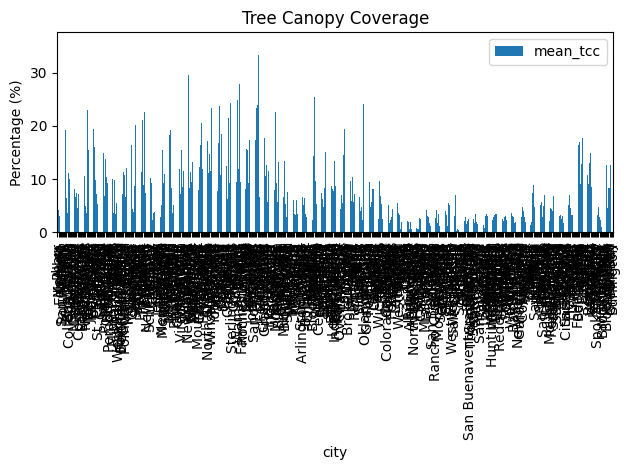

Cities and their tree canopy coverage:
Pharr: 2.9%
McAllen: 4.1%
Edinburg: 3.0%
Laredo: 1.4%
Mission: 4.1%
San Antonio: 9.6%
Round Rock: 11.8%
Austin: 19.2%
Killeen: 6.5%
Brownsville: 3.7%
San Angelo: 11.2%
College Station: 9.9%
Bryan: 10.5%
Houston: 6.5%
Sugar Land: 5.9%
Pearland: 8.1%
Missouri City: 6.7%
League City: 7.3%
Pasadena: 4.6%
Baytown: 7.1%
Corpus Christi: 1.3%
Beaumont: 14.5%
Lake Charles: 7.0%
Lafayette: 9.5%
Baton Rouge: 10.5%
Kenner: 4.9%
New Orleans: 3.7%
Gulfport: 22.9%
Mobile: 15.4%
Tallahassee: 18.5%
Jacksonville: 27.2%
Gainesville: 23.0%
Palm Coast: 19.5%
Deltona: 16.1%
Orlando: 9.8%
Largo: 7.2%
Clearwater: 5.3%
St. Petersburg: 7.7%
Tampa: 5.8%
Lakeland: 8.3%
Cape Coral: 11.3%
Palm Bay: 15.0%
Melbourne: 6.8%
Port St. Lucie: 13.7%
Plantation: 10.4%
Hollywood: 9.2%
Boca Raton: 12.7%
Pembroke Pines: 8.3%
Miramar: 14.4%
Davie: 10.0%
Hialeah: 3.7%
Miami Gardens: 9.8%
Miami Beach: 3.5%
Miami: 5.5%
Sunrise: 6.2%
West Palm Beach: 8.8%
Boynton Beach: 9.9%
Lauderhill: 5.6%
F

In [23]:
import pandas as pd
import geopandas as gpd
import numpy as np
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
from textblob import TextBlob
import matplotlib.pyplot as plt

class TreeCanopyQuerySystem:
    def __init__(self, shapefile_path, tiff_path):
        """Initialize with shapefile and TIFF data paths"""
        self.cities = gpd.read_file(shapefile_path)
        self.tiff_path = tiff_path
        self.city_stats = None
        self.load_data()

    def load_data(self):
        """Load and process the spatial data"""
        with rasterio.open(self.tiff_path) as src:
            raster_crs = src.crs
            raster_bounds = src.bounds
            raster_nodata = src.nodata


        if self.cities.crs != raster_crs:
            self.cities = self.cities.to_crs(raster_crs)


        raster_polygon = box(*raster_bounds)
        self.cities_within = self.cities[self.cities.intersects(raster_polygon)].copy()


        results = []
        for _, city in self.cities_within.iterrows():
            with rasterio.open(self.tiff_path) as src:
                try:
                    out_image, out_transform = mask(src, [city.geometry], crop=True)
                    data = out_image[0]
                    data = data[data != src.nodata]

                    if len(data) > 0:
                        results.append({
                            'city': city.NAME if 'NAME' in city else f"City {_}",
                            'mean_tcc': np.mean(data),
                            'median_tcc': np.median(data),
                            'min_tcc': np.min(data),
                            'max_tcc': np.max(data),
                            'area_km2': city.geometry.area / 1e6,
                            'geometry': city.geometry
                        })
                except ValueError as e:
                    continue

        if results:
            self.city_stats = gpd.GeoDataFrame(results, crs=self.cities.crs)

    def analyze_query(self, question):
        """Analyze the natural language question and return appropriate response"""
        blob = TextBlob(question.lower())


        keywords = {
            'highest': ['highest', 'top', 'maximum', 'most'],
            'lowest': ['lowest', 'bottom', 'minimum', 'least'],
            'average': ['average', 'mean', 'typical'],
            'list': ['list', 'show', 'display'],
            'compare': ['compare', 'versus', 'vs', 'difference'],
            'location': ['where', 'location', 'map']
        }


        question_type = None
        params = {}

        for key, terms in keywords.items():
            if any(term in question.lower() for term in terms):
                question_type = key
                break


        if not self.city_stats.empty:
            if question_type == 'highest':
                n = self._extract_number(question) or 5
                top = self.city_stats.nlargest(n, 'mean_tcc')
                return self._format_response(
                    f"The top {n} cities with highest tree canopy coverage are:\n" +
                    "\n".join([f"{row['city']}: {row['mean_tcc']:.1f}%"
                              for _, row in top.iterrows()]),
                    top
                )

            elif question_type == 'lowest':
                n = self._extract_number(question) or 5
                bottom = self.city_stats.nsmallest(n, 'mean_tcc')
                return self._format_response(
                    f"The {n} cities with lowest tree canopy coverage are:\n" +
                    "\n".join([f"{row['city']}: {row['mean_tcc']:.1f}%"
                              for _, row in bottom.iterrows()]),
                    bottom
                )

            elif question_type == 'average':
                avg = self.city_stats['mean_tcc'].mean()
                return f"The average tree canopy coverage across all cities is {avg:.1f}%"

            elif question_type == 'list':
                return self._format_response(
                    "Cities and their tree canopy coverage:\n" +
                    "\n".join([f"{row['city']}: {row['mean_tcc']:.1f}%"
                              for _, row in self.city_stats.iterrows()]),
                    self.city_stats
                )

            elif question_type == 'compare':
                cities = self._extract_city_names(question)
                if len(cities) >= 2:
                    comparison = self.city_stats[self.city_stats['city'].isin(cities)]
                    if not comparison.empty:
                        return self._format_response(
                            "Comparison of tree canopy coverage:\n" +
                            "\n".join([f"{row['city']}: {row['mean_tcc']:.1f}%"
                                      for _, row in comparison.iterrows()]),
                            comparison
                        )
                return "Could not find specified cities for comparison"

            elif question_type == 'location':
                return self._show_on_map(self.city_stats)

            else:
                return ("I can answer questions about: highest/lowest coverage, average coverage, "
                       "city comparisons, and show locations on a map. Try asking something like: "
                       "'Which cities have the highest tree canopy coverage?'")
        else:
            return "No city data available for analysis"

    def _extract_number(self, text):
        """Extract a number from text if present"""
        blob = TextBlob(text)
        for word, tag in blob.tags:
            if tag == 'CD':
                try:
                    return int(word)
                except ValueError:
                    continue
        return None

    def _extract_city_names(self, text):
        """Attempt to extract city names from text"""

        cities_in_data = set(self.city_stats['city'].str.lower())
        found = []
        for word in text.lower().split():
            if word in cities_in_data:
                found.append(word.title())
        return found

    def _format_response(self, text, data):
        """Format a response with text and optional data/visualization"""
        response = {'answer': text, 'data': data}


        plt.figure(figsize=(10, 6))
        if len(data) > 1:
            data.plot.bar(x='city', y='mean_tcc')
            plt.title('Tree Canopy Coverage')
            plt.ylabel('Percentage (%)')
            plt.tight_layout()
            plt.show()
        response['visualization'] = plt
        return response

    def _show_on_map(self, data):
        """Display the data on a map"""
        fig, ax = plt.subplots(figsize=(12, 8))
        data.plot(column='mean_tcc', ax=ax, legend=True,
                 legend_kwds={'label': "Tree Canopy Cover (%)"},
                 cmap='viridis')
        plt.title('Spatial Distribution of Tree Canopy Cover')
        plt.show()
        return "Here's the map of tree canopy coverage by city:"


query_system = TreeCanopyQuerySystem('CityBoundaries.shp', 'tcc_1km_resolution.tif')


questions = [
    "Which cities have the highest tree canopy coverage?",
    "Show me the 3 cities with lowest coverage",
    "What's the average tree canopy coverage?",
    "Compare coverage between CityA and CityB",
    "Show me a map of tree canopy coverage",
    "List all cities with their coverage percentages"
]

for question in questions:
    print(f"\nQ: {question}")
    response = query_system.analyze_query(question)
    if isinstance(response, dict):
        print(response['answer'])
    else:
        print(response)

<Figure size 1000x600 with 0 Axes>

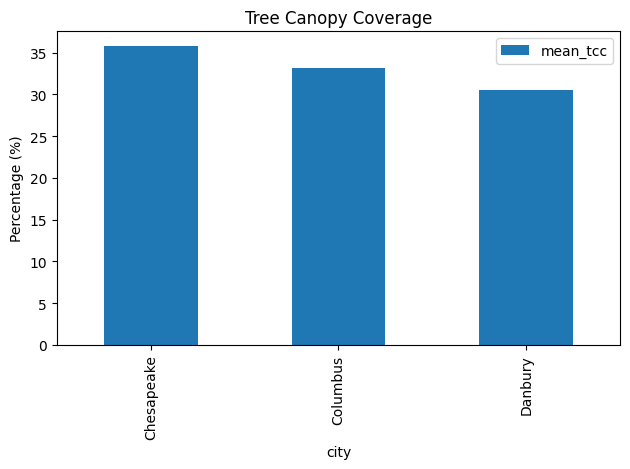

{'answer': 'The top 3 cities with highest tree canopy coverage are:\nChesapeake: 35.8%\nColumbus: 33.2%\nDanbury: 30.5%', 'data':            city   mean_tcc  median_tcc  min_tcc  max_tcc      area_km2  \
108  Chesapeake  35.759448        14.0        0      100  9.161255e-08   
180    Columbus  33.204762        12.0        0      100  5.493073e-08   
98      Danbury  30.482143        10.0        0       91  1.231030e-08   

                                              geometry  
108  POLYGON ((-76.28996 36.82206, -76.28946 36.822...  
180  POLYGON ((-84.69451 32.51874, -84.69641 32.518...  
98   POLYGON ((-73.40729 41.39575, -73.40772 41.395...  , 'visualization': <module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>}


<Figure size 1000x600 with 0 Axes>

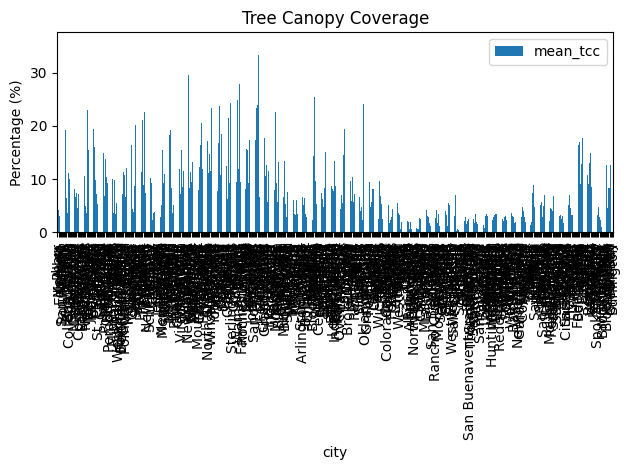

{'answer': "Cities and their tree canopy coverage:\nPharr: 2.9%\nMcAllen: 4.1%\nEdinburg: 3.0%\nLaredo: 1.4%\nMission: 4.1%\nSan Antonio: 9.6%\nRound Rock: 11.8%\nAustin: 19.2%\nKilleen: 6.5%\nBrownsville: 3.7%\nSan Angelo: 11.2%\nCollege Station: 9.9%\nBryan: 10.5%\nHouston: 6.5%\nSugar Land: 5.9%\nPearland: 8.1%\nMissouri City: 6.7%\nLeague City: 7.3%\nPasadena: 4.6%\nBaytown: 7.1%\nCorpus Christi: 1.3%\nBeaumont: 14.5%\nLake Charles: 7.0%\nLafayette: 9.5%\nBaton Rouge: 10.5%\nKenner: 4.9%\nNew Orleans: 3.7%\nGulfport: 22.9%\nMobile: 15.4%\nTallahassee: 18.5%\nJacksonville: 27.2%\nGainesville: 23.0%\nPalm Coast: 19.5%\nDeltona: 16.1%\nOrlando: 9.8%\nLargo: 7.2%\nClearwater: 5.3%\nSt. Petersburg: 7.7%\nTampa: 5.8%\nLakeland: 8.3%\nCape Coral: 11.3%\nPalm Bay: 15.0%\nMelbourne: 6.8%\nPort St. Lucie: 13.7%\nPlantation: 10.4%\nHollywood: 9.2%\nBoca Raton: 12.7%\nPembroke Pines: 8.3%\nMiramar: 14.4%\nDavie: 10.0%\nHialeah: 3.7%\nMiami Gardens: 9.8%\nMiami Beach: 3.5%\nMiami: 5.5%\nSunrise

In [24]:
query_system = TreeCanopyQuerySystem('CityBoundaries.shp', 'tcc_1km_resolution.tif')

print(query_system.analyze_query("Which 3 cities have the highest tree canopy coverage?"))
print(query_system.analyze_query("Show me a map of tree canopy coverage"))
print(query_system.analyze_query("What's the average coverage across all cities?"))

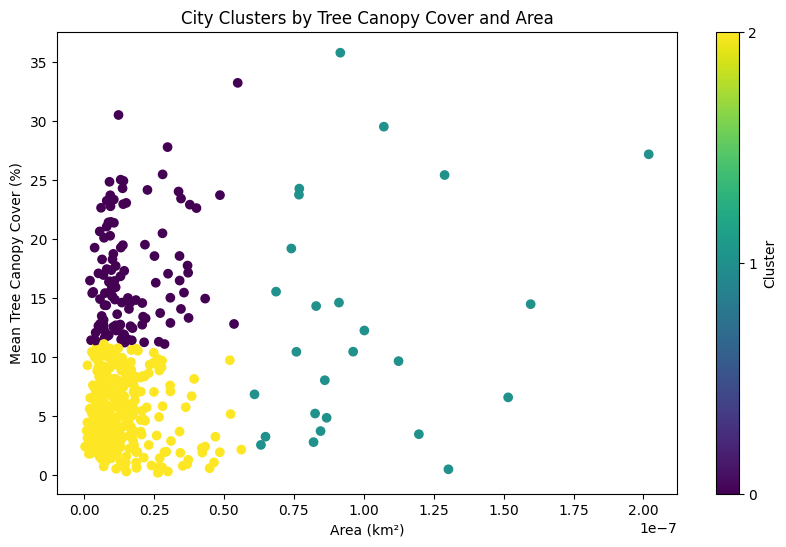


Recommendations for Portland:
Error calling OpenAI: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742

{
  "cluster_type": "High-Coverage",
  "mean_coverage": 8.683501683501683,
  "area_km2": 6.2597956205761794e-09,
  "recommendations": [
    "Protect existing canopy cover (current: 8.7%) through strict preservation laws",
    "Monitor for invasive species and diseases that could threaten canopy",
    "Expand urban wildlife corridors connecting green spaces",
    "Implement carbon credit programs for maintained tree cover",
    "Create city-wide tree inventory and management p

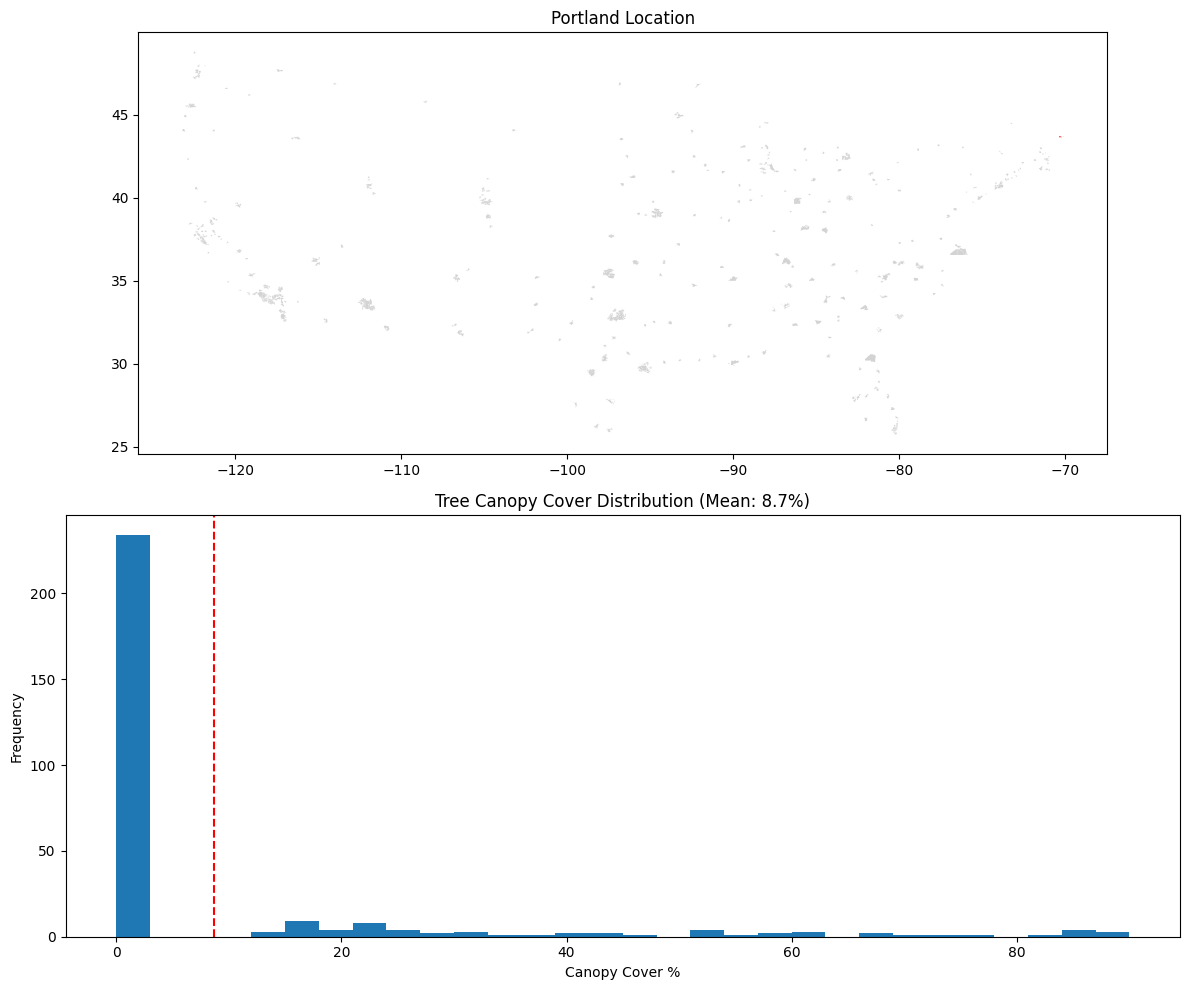


Cluster-level recommendations:
Error calling OpenAI: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742

Error calling OpenAI: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discuss

In [25]:
import openai  # For GPT-4/3.5 access
import pandas as pd
import geopandas as gpd
import numpy as np
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import json

class UrbanTreePolicyEngine:
    def __init__(self, shapefile_path, tiff_path, openai_key=None):
        """Initialize with data paths and optional OpenAI key"""
        self.cities = gpd.read_file(shapefile_path)
        self.tiff_path = tiff_path
        self.city_stats = None
        self.openai_key = openai_key
        self.cluster_data = None
        self.load_data()

        if openai_key:
            OPENAI_API_KEY = openai_key

    def load_data(self):
        """Load and process the spatial data"""
        with rasterio.open(self.tiff_path) as src:
            raster_crs = src.crs
            raster_bounds = src.bounds
            raster_nodata = src.nodata

        # Ensure matching CRS
        if self.cities.crs != raster_crs:
            self.cities = self.cities.to_crs(raster_crs)

        # Create raster extent polygon
        raster_polygon = box(*raster_bounds)
        self.cities_within = self.cities[self.cities.intersects(raster_polygon)].copy()

        # Process each city
        results = []
        for _, city in self.cities_within.iterrows():
            with rasterio.open(self.tiff_path) as src:
                try:
                    out_image, out_transform = mask(src, [city.geometry], crop=True)
                    data = out_image[0]
                    data = data[data != src.nodata]  # Remove no-data values

                    if len(data) > 0:
                        results.append({
                            'city': city.NAME if 'NAME' in city else f"City {_}",
                            'mean_tcc': np.mean(data),
                            'median_tcc': np.median(data),
                            'min_tcc': np.min(data),
                            'max_tcc': np.max(data),
                            'area_km2': city.geometry.area / 1e6,
                            'geometry': city.geometry
                        })
                except ValueError as e:
                    continue

        if results:
            self.city_stats = gpd.GeoDataFrame(results, crs=self.cities.crs)
            self._cluster_cities()

    def _cluster_cities(self):
        """Cluster cities based on their tree canopy characteristics"""
        if self.city_stats is None or len(self.city_stats) == 0:
            return

        # Prepare features for clustering
        X = self.city_stats[['mean_tcc', 'area_km2']]
        X = (X - X.mean()) / X.std()  # Standardize

        # Cluster into 3 groups
        kmeans = KMeans(n_clusters=3, random_state=42)
        self.city_stats['cluster'] = kmeans.fit_predict(X)
        self.cluster_data = {
            'cluster_centers': kmeans.cluster_centers_,
            'cluster_labels': ['Low-Coverage', 'Medium-Coverage', 'High-Coverage']
        }

        # Visualize clusters
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(
            self.city_stats['area_km2'],
            self.city_stats['mean_tcc'],
            c=self.city_stats['cluster'],
            cmap='viridis'
        )
        plt.colorbar(scatter, ticks=[0, 1, 2], label='Cluster')
        plt.title('City Clusters by Tree Canopy Cover and Area')
        plt.xlabel('Area (km²)')
        plt.ylabel('Mean Tree Canopy Cover (%)')
        plt.show()

    def generate_policy_recommendations(self, city_name=None, use_llm=True):
        """
        Generate policy recommendations either:
        - For a specific city
        - For each cluster of cities
        - Using either algorithmic rules or LLM enhancement
        """
        if self.city_stats is None:
            return "No city data available for analysis"

        if city_name:
            # Get specific city data
            city_data = self.city_stats[self.city_stats['city'].str.lower() == city_name.lower()]
            if len(city_data) == 0:
                return f"No data found for city: {city_name}"

            city_data = city_data.iloc[0]
            cluster = city_data['cluster']
            cluster_type = self.cluster_data['cluster_labels'][cluster]

            base_recommendations = self._get_base_recommendations(city_data, cluster_type)

            if use_llm and self.openai_key:
                return self._enhance_with_llm(city_data, base_recommendations, specific_city=True)
            return base_recommendations
        else:
            # Generate cluster-level recommendations
            all_recommendations = {}
            for cluster_num, cluster_label in enumerate(self.cluster_data['cluster_labels']):
                cluster_cities = self.city_stats[self.city_stats['cluster'] == cluster_num]
                cluster_avg = cluster_cities[['mean_tcc', 'area_km2']].mean().to_dict()

                base_recs = self._get_base_recommendations(cluster_avg, cluster_label, is_cluster=True)

                if use_llm and self.openai_key:
                    enhanced = self._enhance_with_llm(cluster_avg, base_recs, specific_city=False)
                    all_recommendations[cluster_label] = enhanced
                else:
                    all_recommendations[cluster_label] = base_recs

            return all_recommendations

    def _get_base_recommendations(self, city_data, cluster_type, is_cluster=False):
        """Generate basic algorithmic recommendations"""
        tcc = city_data['mean_tcc']
        area = city_data['area_km2']

        recs = []

        if cluster_type == 'Low-Coverage':
            recs.append(f"Implement aggressive tree planting programs targeting a {min(40, tcc + 15)}% canopy cover goal")
            recs.append("Prioritize street tree planting in neighborhoods with lowest current coverage")
            recs.append("Adopt tree preservation ordinances for new developments")
            recs.append("Create urban forestry departments with dedicated funding")

        elif cluster_type == 'Medium-Coverage':
            recs.append(f"Maintain current canopy cover through preservation (target: {tcc:.1f}%)")
            recs.append("Focus on replacing aging tree stock with climate-resilient species")
            recs.append("Implement 'green infrastructure' requirements for new construction")
            recs.append("Develop community education programs about tree maintenance")

        elif cluster_type == 'High-Coverage':
            recs.append(f"Protect existing canopy cover (current: {tcc:.1f}%) through strict preservation laws")
            recs.append("Monitor for invasive species and diseases that could threaten canopy")
            recs.append("Expand urban wildlife corridors connecting green spaces")
            recs.append("Implement carbon credit programs for maintained tree cover")

        # Area-based additions
        if area > 500:  # Large cities
            recs.append("Develop district-level canopy cover strategies for different neighborhoods")
        elif area < 100:  # Small cities
            recs.append("Create city-wide tree inventory and management plan")

        return {
            'cluster_type': cluster_type,
            'mean_coverage': tcc,
            'area_km2': area,
            'recommendations': recs
        }

    def _enhance_with_llm(self, city_data, base_recommendations, specific_city=True):
        """Use LLM to enhance the recommendations with more nuanced suggestions"""
        if not self.openai_key:
            return base_recommendations

        prompt = f"""
        You are an urban planning expert specializing in urban forestry and tree canopy management.

        {'For the city' if specific_city else 'For a group of cities'} with these characteristics:
        - Mean tree canopy coverage: {city_data['mean_tcc']:.1f}%
        - Area: {city_data['area_km2']:.1f} km²
        - Classification: {base_recommendations['cluster_type']}

        These initial recommendations have been generated:
        {chr(10).join(base_recommendations['recommendations'])}

        Please enhance these recommendations by:
        1. Adding 3-5 more specific, actionable policy suggestions
        2. Including relevant case studies from similar cities
        3. Suggesting metrics to track progress
        4. Providing implementation timelines
        5. Estimating potential costs/benefits

        Structure your response as a JSON object with these keys:
        - "enhanced_recommendations" (array of strings)
        - "case_studies" (array of strings)
        - "metrics" (array of strings)
        - "timeline" (object with short/medium/long-term phases)
        - "cost_benefit" (object with estimated costs and benefits)
        """

        try:
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[{"role": "user", "content": prompt}],
                temperature=0.7,
                max_tokens=1500
            )

            enhanced = json.loads(response.choices[0].message.content)
            return {**base_recommendations, **enhanced}

        except Exception as e:
            print(f"Error calling OpenAI: {e}")
            return base_recommendations

    def visualize_city(self, city_name):
        """Show detailed visualization for a specific city"""
        if self.city_stats is None:
            print("No city data available")
            return

        city_data = self.city_stats[self.city_stats['city'].str.lower() == city_name.lower()]
        if len(city_data) == 0:
            print(f"No data found for city: {city_name}")
            return

        city_data = city_data.iloc[0]

        fig, ax = plt.subplots(2, 1, figsize=(12, 10))

        # Map visualization
        self.city_stats.plot(ax=ax[0], color='lightgrey')
        gpd.GeoSeries([city_data.geometry]).plot(ax=ax[0], color='red')
        ax[0].set_title(f"{city_data['city']} Location")

        # Coverage distribution
        with rasterio.open(self.tiff_path) as src:
            out_image, _ = mask(src, [city_data.geometry], crop=True)
            data = out_image[0]
            data = data[data != src.nodata]

            ax[1].hist(data, bins=30)
            ax[1].axvline(city_data['mean_tcc'], color='red', linestyle='--')
            ax[1].set_title(f"Tree Canopy Cover Distribution (Mean: {city_data['mean_tcc']:.1f}%)")
            ax[1].set_xlabel('Canopy Cover %')
            ax[1].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

# Example Usage
if __name__ == "__main__":
    # Initialize with your paths
    policy_engine = UrbanTreePolicyEngine(
        shapefile_path='CityBoundaries.shp',
        tiff_path='tcc_1km_resolution.tif',
        openai_key='your-api-key-here'  # Optional
    )

    # Get recommendations for a specific city
    print("\nRecommendations for Portland:")
    portland_recs = policy_engine.generate_policy_recommendations(city_name="Portland")
    print(json.dumps(portland_recs, indent=2))

    # Visualize a city
    policy_engine.visualize_city("Portland")

    # Get cluster-level recommendations
    print("\nCluster-level recommendations:")
    cluster_recs = policy_engine.generate_policy_recommendations()
    print(json.dumps(cluster_recs, indent=2))

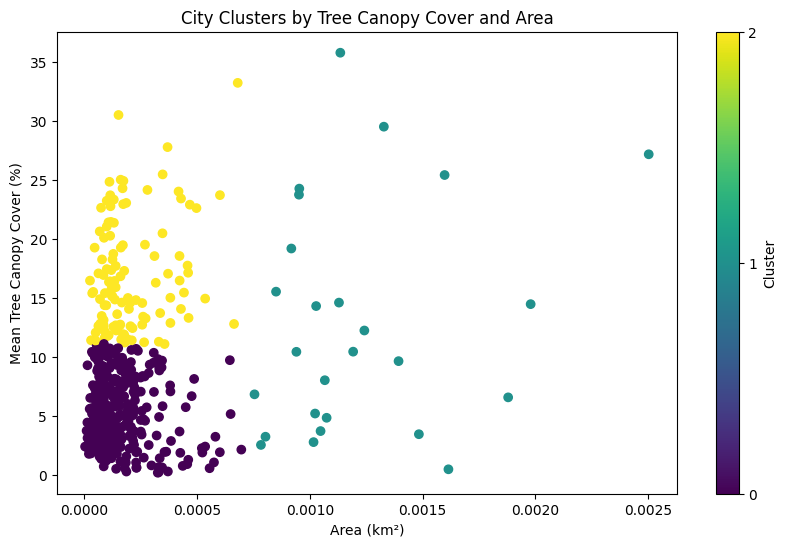


Cluster-level recommendations:
{
  "Low-Coverage": {
    "cluster_type": "Low-Coverage",
    "mean_coverage": 5.158427297045377,
    "area_km2": 0.0001521645350250649,
    "recommendations": [
      "Implement aggressive tree planting programs targeting a 20.158427297045378% canopy cover goal",
      "Prioritize street tree planting in neighborhoods with lowest current coverage",
      "Adopt tree preservation ordinances for new developments",
      "Create urban forestry departments with dedicated funding",
      "Create city-wide tree inventory and management plan"
    ]
  },
  "Medium-Coverage": {
    "cluster_type": "Medium-Coverage",
    "mean_coverage": 12.83855490018752,
    "area_km2": 0.0012188025730078625,
    "recommendations": [
      "Maintain current canopy cover through preservation (target: 12.8%)",
      "Focus on replacing aging tree stock with climate-resilient species",
      "Implement 'green infrastructure' requirements for new construction",
      "Develop commu

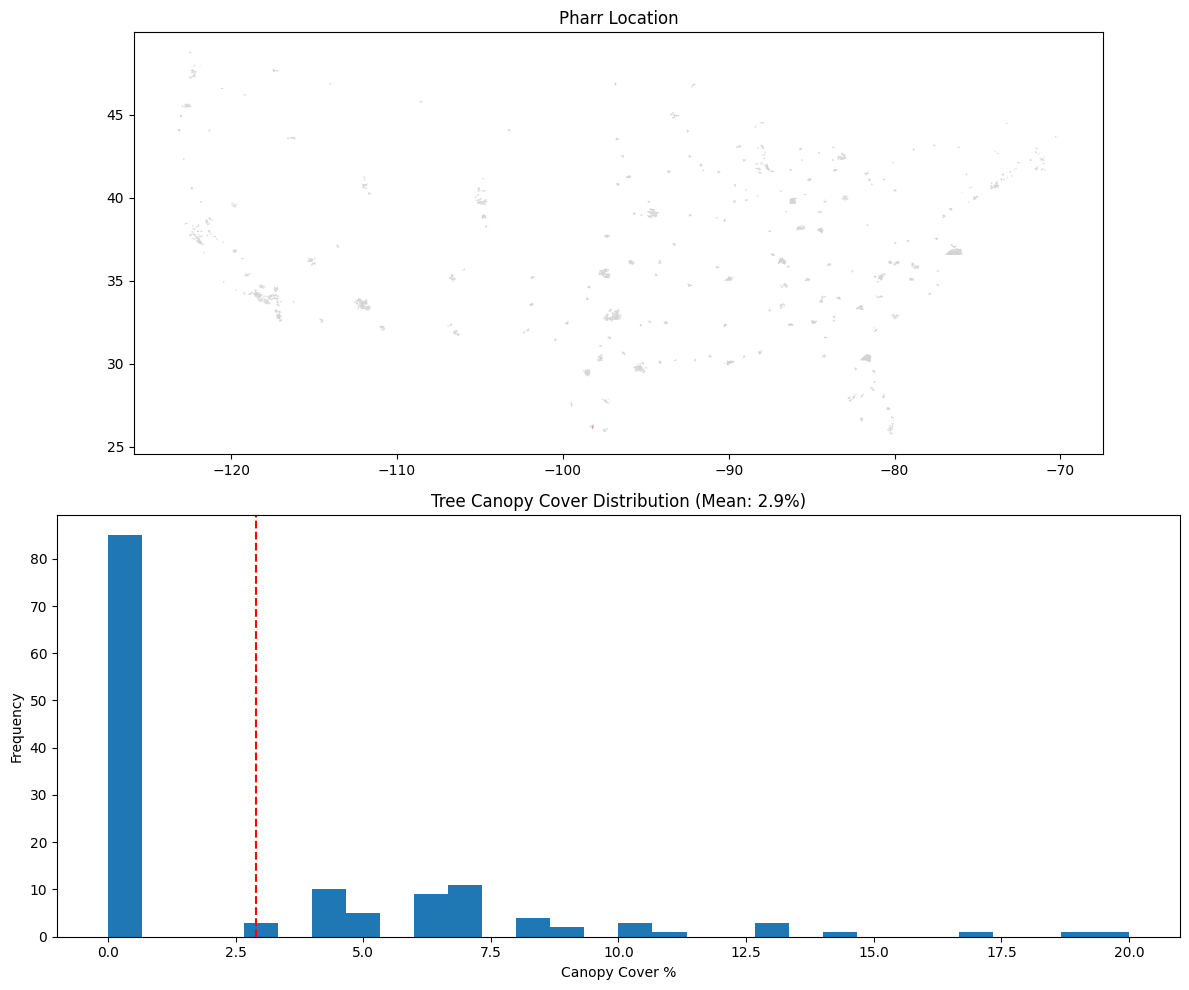

In [27]:
from openai import OpenAI  # Updated import for v1.0+
import pandas as pd
import geopandas as gpd
import numpy as np
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import json
import os

class UrbanTreePolicyEngine:
    def __init__(self, shapefile_path, tiff_path, openai_key=None):
        """Initialize with data paths and optional OpenAI key"""
        self.cities = gpd.read_file(shapefile_path)
        self.tiff_path = tiff_path
        self.city_stats = None
        self.openai_key = openai_key
        self.cluster_data = None
        self.client = OpenAI(api_key=openai_key) if openai_key else None
        self.load_data()

    def load_data(self):
        """Load and process the spatial data"""
        with rasterio.open(self.tiff_path) as src:
            raster_crs = src.crs
            raster_bounds = src.bounds
            raster_nodata = src.nodata

        # Ensure matching CRS
        if self.cities.crs != raster_crs:
            self.cities = self.cities.to_crs(raster_crs)

        # Create raster extent polygon
        raster_polygon = box(*raster_bounds)
        self.cities_within = self.cities[self.cities.intersects(raster_polygon)].copy()

        # Process each city
        results = []
        for _, city in self.cities_within.iterrows():
            with rasterio.open(self.tiff_path) as src:
                try:
                    out_image, out_transform = mask(src, [city.geometry], crop=True)
                    data = out_image[0]
                    data = data[data != src.nodata]  # Remove no-data values

                    if len(data) > 0:
                        # Calculate area in km² properly
                        area_km2 = city.geometry.area * (111.32**2) / 1e6  # Convert degrees to km² approximation

                        results.append({
                            'city': city.NAME if 'NAME' in city else f"City {_}",
                            'mean_tcc': np.mean(data),
                            'median_tcc': np.median(data),
                            'min_tcc': np.min(data),
                            'max_tcc': np.max(data),
                            'area_km2': area_km2,
                            'geometry': city.geometry
                        })
                except ValueError as e:
                    continue

        if results:
            self.city_stats = gpd.GeoDataFrame(results, crs=self.cities.crs)
            self._cluster_cities()

    def _cluster_cities(self):
        """Cluster cities based on their tree canopy characteristics"""
        if self.city_stats is None or len(self.city_stats) == 0:
            return

        # Prepare features for clustering
        X = self.city_stats[['mean_tcc', 'area_km2']].copy()
        X['mean_tcc'] = X['mean_tcc'].fillna(X['mean_tcc'].mean())
        X['area_km2'] = X['area_km2'].fillna(X['area_km2'].mean())
        X = (X - X.mean()) / X.std()  # Standardize

        # Cluster into 3 groups
        kmeans = KMeans(n_clusters=3, random_state=42)
        self.city_stats['cluster'] = kmeans.fit_predict(X)

        # Sort clusters by mean TCC (low to high)
        cluster_order = self.city_stats.groupby('cluster')['mean_tcc'].mean().sort_values().index
        self.cluster_data = {
            'cluster_centers': kmeans.cluster_centers_,
            'cluster_labels': ['Low-Coverage', 'Medium-Coverage', 'High-Coverage']
        }

        # Reassign cluster labels based on sorted order
        cluster_mapping = {old: new for new, old in enumerate(cluster_order)}
        self.city_stats['cluster'] = self.city_stats['cluster'].map(cluster_mapping)

        # Visualize clusters
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(
            self.city_stats['area_km2'],
            self.city_stats['mean_tcc'],
            c=self.city_stats['cluster'],
            cmap='viridis'
        )
        plt.colorbar(scatter, ticks=[0, 1, 2], label='Cluster')
        plt.title('City Clusters by Tree Canopy Cover and Area')
        plt.xlabel('Area (km²)')
        plt.ylabel('Mean Tree Canopy Cover (%)')
        plt.show()

    def generate_policy_recommendations(self, city_name=None, use_llm=True):
        """
        Generate policy recommendations either:
        - For a specific city
        - For each cluster of cities
        - Using either algorithmic rules or LLM enhancement
        """
        if self.city_stats is None:
            return "No city data available for analysis"

        if city_name:
            # Get specific city data
            city_data = self.city_stats[self.city_stats['city'].str.lower() == city_name.lower()]
            if len(city_data) == 0:
                return f"No data found for city: {city_name}"

            city_data = city_data.iloc[0]
            cluster = city_data['cluster']
            cluster_type = self.cluster_data['cluster_labels'][cluster]

            base_recommendations = self._get_base_recommendations(city_data, cluster_type)

            if use_llm and self.client:
                return self._enhance_with_llm(city_data, base_recommendations, specific_city=True)
            return base_recommendations
        else:
            # Generate cluster-level recommendations
            all_recommendations = {}
            for cluster_num, cluster_label in enumerate(self.cluster_data['cluster_labels']):
                cluster_cities = self.city_stats[self.city_stats['cluster'] == cluster_num]
                if len(cluster_cities) == 0:
                    continue

                cluster_avg = {
                    'mean_tcc': cluster_cities['mean_tcc'].mean(),
                    'area_km2': cluster_cities['area_km2'].mean(),
                    'cluster_type': cluster_label
                }

                base_recs = self._get_base_recommendations(cluster_avg, cluster_label, is_cluster=True)

                if use_llm and self.client:
                    enhanced = self._enhance_with_llm(cluster_avg, base_recs, specific_city=False)
                    all_recommendations[cluster_label] = enhanced
                else:
                    all_recommendations[cluster_label] = base_recs

            return all_recommendations

    def _get_base_recommendations(self, city_data, cluster_type, is_cluster=False):
        """Generate basic algorithmic recommendations"""
        tcc = city_data['mean_tcc']
        area = city_data['area_km2']

        recs = []

        if cluster_type == 'Low-Coverage':
            recs.append(f"Implement aggressive tree planting programs targeting a {min(40, tcc + 15)}% canopy cover goal")
            recs.append("Prioritize street tree planting in neighborhoods with lowest current coverage")
            recs.append("Adopt tree preservation ordinances for new developments")
            recs.append("Create urban forestry departments with dedicated funding")

        elif cluster_type == 'Medium-Coverage':
            recs.append(f"Maintain current canopy cover through preservation (target: {tcc:.1f}%)")
            recs.append("Focus on replacing aging tree stock with climate-resilient species")
            recs.append("Implement 'green infrastructure' requirements for new construction")
            recs.append("Develop community education programs about tree maintenance")

        elif cluster_type == 'High-Coverage':
            recs.append(f"Protect existing canopy cover (current: {tcc:.1f}%) through strict preservation laws")
            recs.append("Monitor for invasive species and diseases that could threaten canopy")
            recs.append("Expand urban wildlife corridors connecting green spaces")
            recs.append("Implement carbon credit programs for maintained tree cover")

        # Area-based additions
        if area > 500:  # Large cities
            recs.append("Develop district-level canopy cover strategies for different neighborhoods")
        elif area < 100:  # Small cities
            recs.append("Create city-wide tree inventory and management plan")

        return {
            'cluster_type': cluster_type,
            'mean_coverage': tcc,
            'area_km2': area,
            'recommendations': recs
        }

    def _enhance_with_llm(self, city_data, base_recommendations, specific_city=True):
        """Use LLM to enhance the recommendations with more nuanced suggestions"""
        if not self.client:
            return base_recommendations

        prompt = f"""
        You are an urban planning expert specializing in urban forestry and tree canopy management.

        {'For the city' if specific_city else 'For a group of cities'} with these characteristics:
        - Mean tree canopy coverage: {city_data['mean_tcc']:.1f}%
        - Area: {city_data['area_km2']:.1f} km²
        - Classification: {base_recommendations['cluster_type']}

        These initial recommendations have been generated:
        {chr(10).join(base_recommendations['recommendations'])}

        Please enhance these recommendations by:
        1. Adding 3-5 more specific, actionable policy suggestions
        2. Including relevant case studies from similar cities
        3. Suggesting metrics to track progress
        4. Providing implementation timelines
        5. Estimating potential costs/benefits

        Structure your response as a JSON object with these keys:
        - "enhanced_recommendations" (array of strings)
        - "case_studies" (array of strings)
        - "metrics" (array of strings)
        - "timeline" (object with short/medium/long-term phases)
        - "cost_benefit" (object with estimated costs and benefits)
        """

        try:
            response = self.client.chat.completions.create(
                model="gpt-4",
                messages=[{"role": "user", "content": prompt}],
                temperature=0.7,
                max_tokens=1500,
                response_format={"type": "json_object"}
            )

            enhanced = json.loads(response.choices[0].message.content)
            return {**base_recommendations, **enhanced}

        except Exception as e:
            print(f"Error calling OpenAI: {e}")
            return base_recommendations

    def visualize_city(self, city_name):
        """Show detailed visualization for a specific city"""
        if self.city_stats is None:
            print("No city data available")
            return

        city_data = self.city_stats[self.city_stats['city'].str.lower() == city_name.lower()]
        if len(city_data) == 0:
            print(f"No data found for city: {city_name}")
            return

        city_data = city_data.iloc[0]

        fig, ax = plt.subplots(2, 1, figsize=(12, 10))

        # Map visualization
        self.city_stats.plot(ax=ax[0], color='lightgrey')
        gpd.GeoSeries([city_data.geometry]).plot(ax=ax[0], color='red')
        ax[0].set_title(f"{city_data['city']} Location")

        # Coverage distribution
        with rasterio.open(self.tiff_path) as src:
            out_image, _ = mask(src, [city_data.geometry], crop=True)
            data = out_image[0]
            data = data[data != src.nodata]

            ax[1].hist(data, bins=30)
            ax[1].axvline(city_data['mean_tcc'], color='red', linestyle='--')
            ax[1].set_title(f"Tree Canopy Cover Distribution (Mean: {city_data['mean_tcc']:.1f}%)")
            ax[1].set_xlabel('Canopy Cover %')
            ax[1].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

# Example Usage
if __name__ == "__main__":
    # Initialize with your paths
    policy_engine = UrbanTreePolicyEngine(
        shapefile_path='CityBoundaries.shp',
        tiff_path='tcc_1km_resolution.tif',
        openai_key=os.getenv('OPENAI_API_KEY')  # Set your API key in environment variables
    )

    # Get recommendations for all clusters
    print("\nCluster-level recommendations:")
    cluster_recs = policy_engine.generate_policy_recommendations(use_llm=False)
    print(json.dumps(cluster_recs, indent=2))

    # Get recommendations for a specific city (if you know city names in your data)
    if not policy_engine.city_stats.empty:
        sample_city = policy_engine.city_stats.iloc[0]['city']
        print(f"\nRecommendations for {sample_city}:")
        city_recs = policy_engine.generate_policy_recommendations(city_name=sample_city, use_llm=False)
        print(json.dumps(city_recs, indent=2))

        # Visualize the city
        policy_engine.visualize_city(sample_city)